 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_data = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_data)
#print(whale_returns_df)

In [3]:
# Count nulls
whale_returns_df.isnull().sum()
#print(whale_returns_df.isnull().sum())

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()
#print(whale_returns_df)
whale_returns_df.dtypes

Date                            object
SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [5]:
### # Set the date as the index to the DataFrame
whale_returns_df.set_index(pd.to_datetime(whale_returns_df['Date'], infer_datetime_format=True), inplace=True)
#whale_returns_df.head()

C:\Users\iluri\AppData\Local\Temp\ipykernel_20164\1421690143.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_returns_df.set_index(pd.to_datetime(whale_returns_df['Date'], infer_datetime_format=True), inplace=True)


In [6]:
### Drop Extra Date Column
whale_returns_df.drop(columns=['Date'], inplace=True)


In [7]:
whale_returns_df.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'],
      dtype='object')

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algorithmic returns
algo_returns_data = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_data)
#print(algo_returns_df)

In [9]:
# Count nulls
algo_returns_df.isnull().sum()
#print(algo_returns_df.isnull().sum())


Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()
#print(algo_returns_df)
algo_returns_df.dtypes

Date       object
Algo 1    float64
Algo 2    float64
dtype: object

In [11]:
### # Set the date as the index to the DataFrame
algo_returns_df.set_index(pd.to_datetime(algo_returns_df['Date'], infer_datetime_format=True), inplace=True)
#algo_returns_df.head()

C:\Users\iluri\AppData\Local\Temp\ipykernel_20164\3786864803.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_returns_df.set_index(pd.to_datetime(algo_returns_df['Date'], infer_datetime_format=True), inplace=True)


In [12]:
# Drop the extra date column
algo_returns_df.columns

Index(['Date', 'Algo 1', 'Algo 2'], dtype='object')

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [13]:
# Reading S&P 500 Closing Prices
sp500_history_data = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_data)
#print(sp500_history_df)

In [14]:
# Check Data Types
print(sp500_history_df.dtypes)

Date     object
Close    object
dtype: object


In [15]:
# Fix Data Types
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "")
sp500_history_df["Close"] = sp500_history_df["Close"].astype("float")

In [16]:
### Check Data Types after Fixing
sp500_history_df.dtypes

Date      object
Close    float64
dtype: object

In [17]:
### Sort by date, ascending
sp500_history_df['Date'] = pd.to_datetime(sp500_history_df['Date'])
sp500_history_df = sp500_history_df.sort_values(by = 'Date')
#print(sp500_history_df)

C:\Users\iluri\AppData\Local\Temp\ipykernel_20164\346602801.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_history_df['Date'] = pd.to_datetime(sp500_history_df['Date'])


In [18]:
### # Set the date as the index to the DataFrame
sp500_history_df.set_index(pd.to_datetime(sp500_history_df['Date'], infer_datetime_format=True), inplace=True)
#sp500_history_df.head()

C:\Users\iluri\AppData\Local\Temp\ipykernel_20164\2187759476.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_history_df.set_index(pd.to_datetime(sp500_history_df['Date'], infer_datetime_format=True), inplace=True)


In [19]:
# Drop the extra date column
sp500_history_df.drop(columns=['Date'], inplace=True)
#sp500_history_df.columns

In [20]:
# Calculate Daily Returns
sp500_daily_returns_df = sp500_history_df.pct_change()
#print(sp500_daily_returns_df)

In [21]:
### Check Daily_Returns calculation
print(sp500_daily_returns_df)

               Close
Date                
2012-10-01       NaN
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
...              ...
2019-04-16  0.000509
2019-04-17 -0.002274
2019-04-18  0.001579
2019-04-22  0.001012
2019-04-23  0.008841

[1649 rows x 1 columns]


In [22]:
# Drop nulls
sp500_daily_returns_df = sp500_daily_returns_df.dropna()
#print(sp500_daily_returns_df)

In [23]:
sp500_history_df.columns

Index(['Close'], dtype='object')

In [24]:
# # Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns_df.rename(columns={'Close': 'S&P TSX'}, inplace=True)
#print(sp500_daily_returns_df)


## Combine Whale, Algorithmic, and S&P 500 Returns

In [25]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
# *** jdr = " Joined Daily Returns"
# *** jdr = " Joined Daily Returns"
# *** jdr = " Joined Daily Returns"

jdr_df = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns_df], axis='columns', join='inner')

jdr_df.columns
jdr_df.drop(columns=['Date'], inplace=True)

print(jdr_df)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   
2019-04-23                   0.007167            0.003485   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496             

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

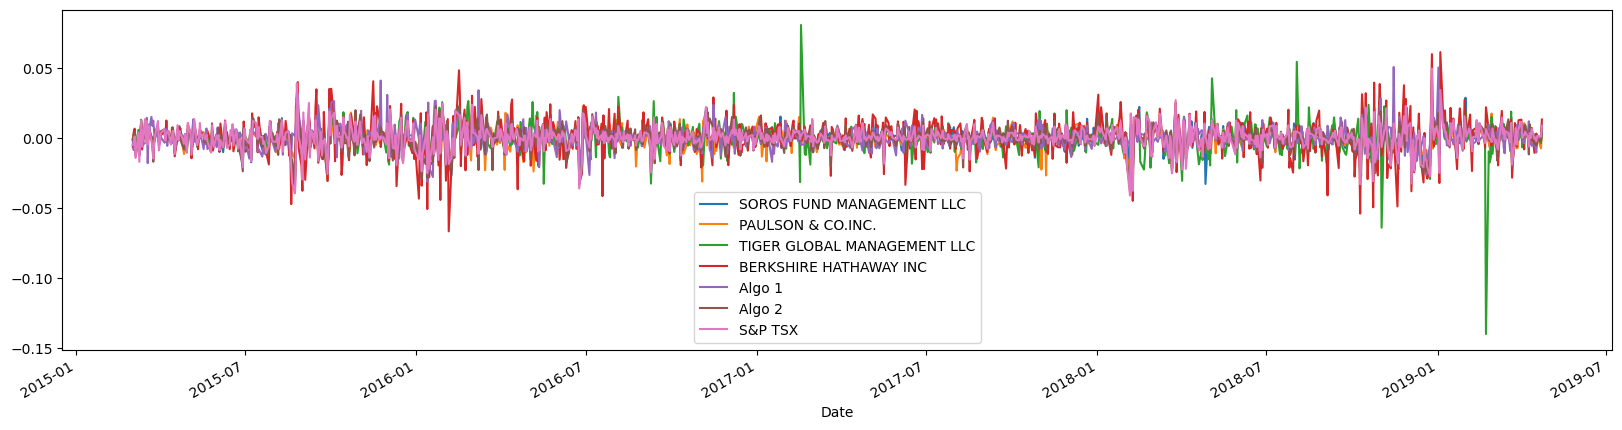

In [26]:
# Plot daily returns of all portfolios
jdr_df.plot(figsize=(20,5))

#### Calculate and Plot cumulative returns.

In [27]:
#joined_df.columns
#joined_df.drop(columns=['Date'], inplace=True)

<Axes: xlabel='Date'>

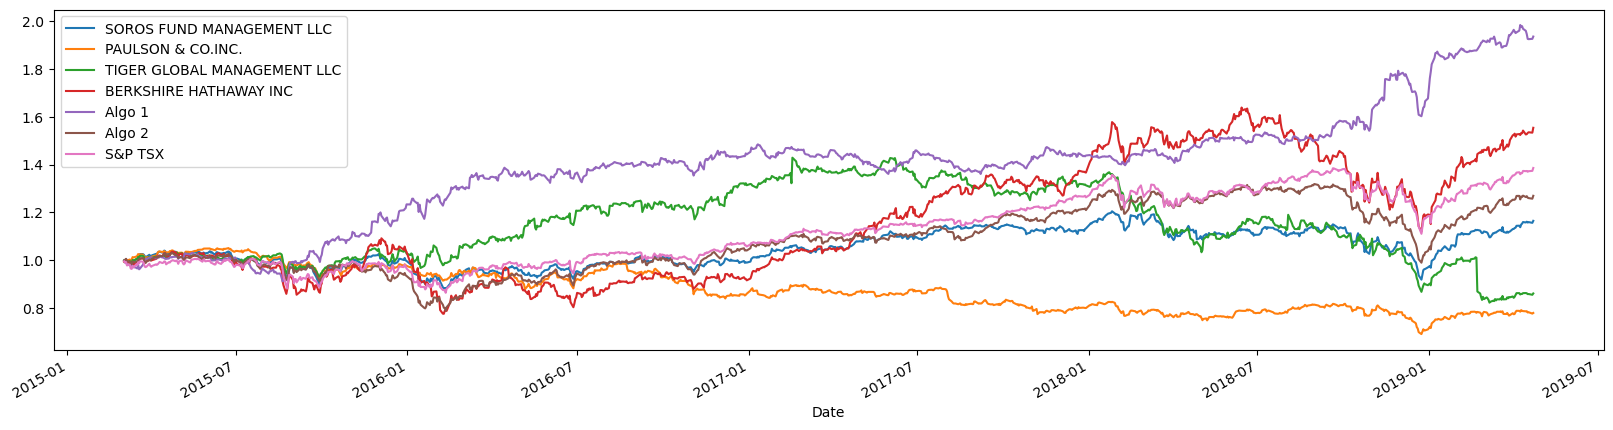

In [28]:
# Calculate cumulative returns of all portfolios
# *** jcr = " Joined Cumulative Returns"
# *** jcr = " Joined Cumulative Returns"
# *** jcr = " Joined Cumulative Returns"
jcr_df = (1 + jdr_df).cumprod()
jcr_df.plot(figsize=(20,5))
# Plot cumulative returns


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

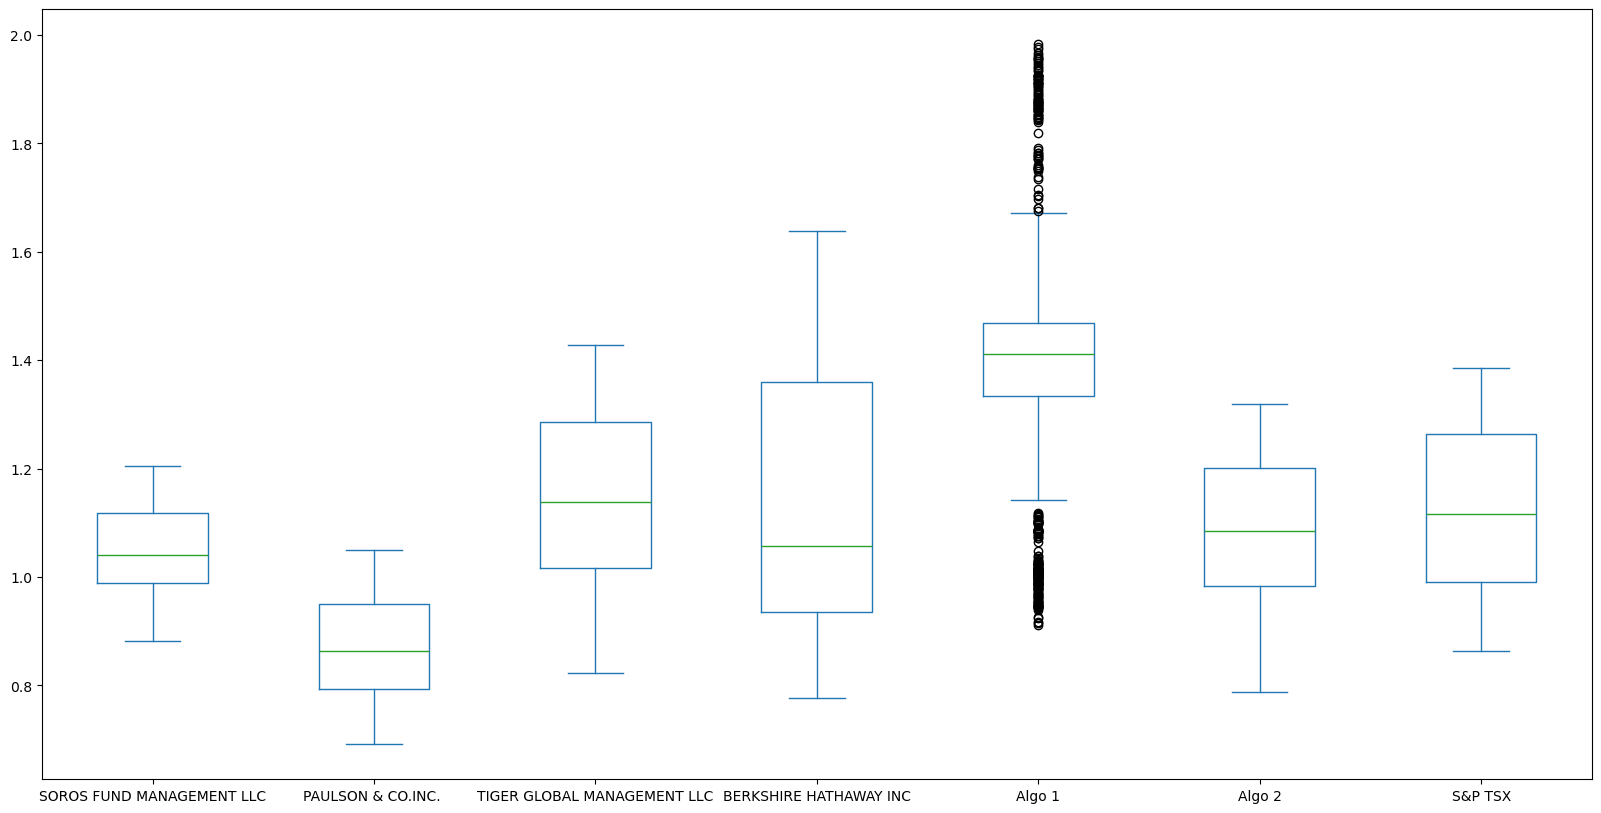

In [29]:
# Box plot to visually show risk
jcr_df.plot(kind = "box", figsize=(20,10))

### Calculate Standard Deviations

In [30]:
# Calculate the daily standard deviations of all portfolios
joined_daily_std = jdr_df.std()

print( "The daily standard deviation of each of the portfolios is:")

print(joined_daily_std)


The daily standard deviation of each of the portfolios is:
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P TSX                        0.008554
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [31]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_std = joined_daily_std.loc["S&P TSX"]

#print()
print(f"\nThe daily standard deviation for S&P 500 is {sp500_daily_std}\n")
#print()

# Determine which portfolios are riskier than the S&P 500
joined_daily_std = joined_daily_std.sort_values()
print(joined_daily_std, "\n")
#print()
print("The following portfolios are riskier than S&P 500:")


for i in range(len(joined_daily_std)):
    if joined_daily_std[i] > sp500_daily_std:        
        #print(f"{joined_daily_std.index.[i]}{joined_daily_std[i]}")
        print (f"{joined_daily_std.index[i]} with the daily standard deviation of {joined_daily_std[i]}")
print()



The daily standard deviation for S&P 500 is 0.008553731597758204

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P TSX                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64 

The following portfolios are riskier than S&P 500:
TIGER GLOBAL MANAGEMENT LLC with the daily standard deviation of 0.010893969618743005
BERKSHIRE HATHAWAY INC with the daily standard deviation of 0.012918618441883491



C:\Users\iluri\AppData\Local\Temp\ipykernel_20164\424988965.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if joined_daily_std[i] > sp500_daily_std:
C:\Users\iluri\AppData\Local\Temp\ipykernel_20164\424988965.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print (f"{joined_daily_std.index[i]} with the daily standard deviation of {joined_daily_std[i]}")


### Calculate the Annualized Standard Deviation

In [32]:
# Calculate the annualized standard deviation (252 trading days)
joined_annual_std = joined_daily_std * np.sqrt(252)
print(f"The annualized standard deviations are:\n{joined_annual_std}")

The annualized standard deviations are:
PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P TSX                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

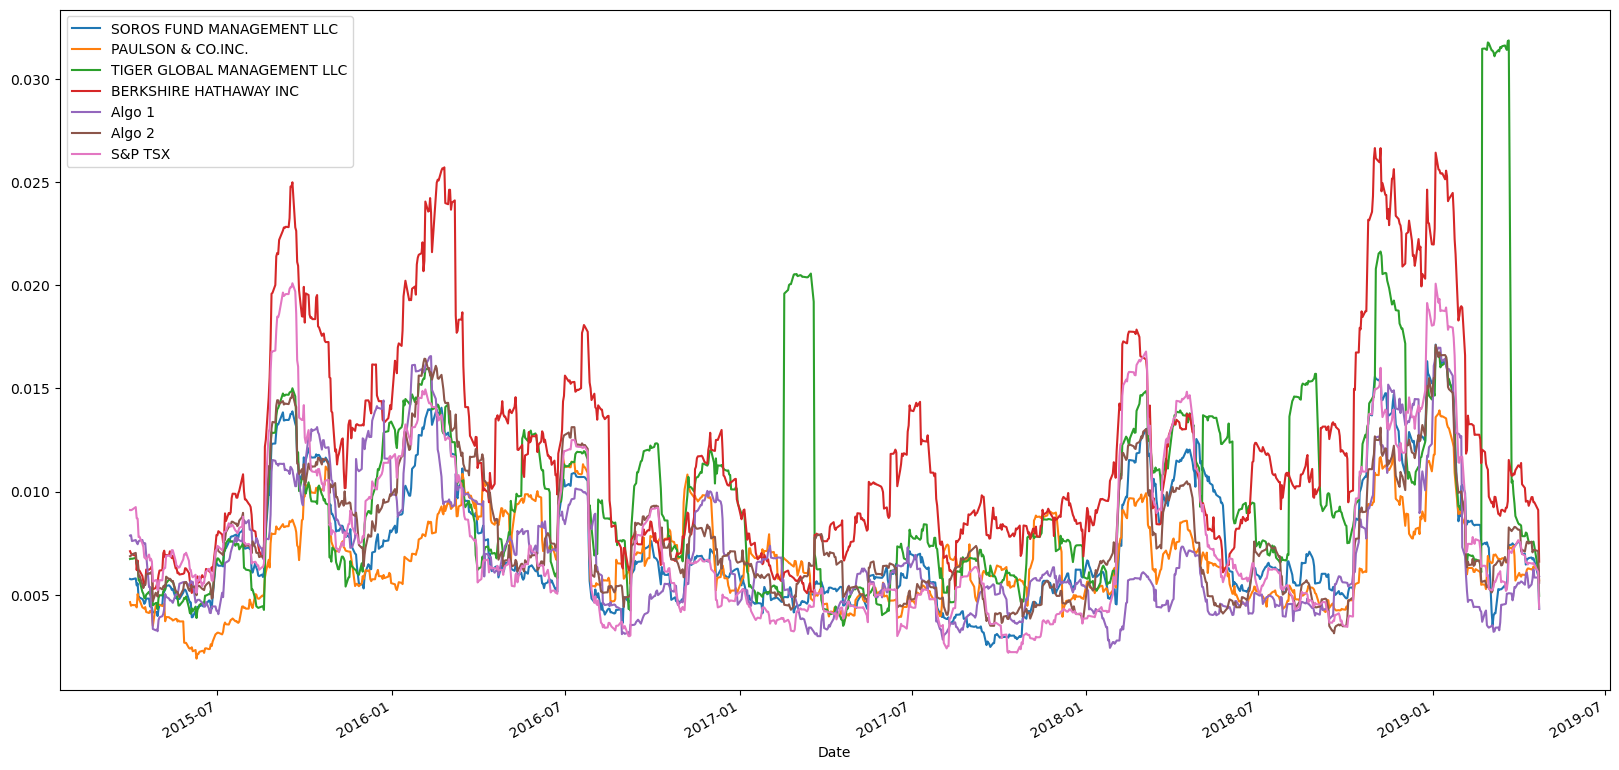

In [33]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_21 = jdr_df.rolling(window=21).std()
#print(rolling_std_21)
# Plot the rolling standard deviation
rolling_std_21.plot(figsize=(20,10))

### Calculate and plot the correlation

In [34]:
# Calculate the correlation
correlation = jdr_df.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P TSX,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

The covariance of BERKSHIRE HATHAWAY INC and S&P TSX: 8.302834941861669e-05
The variance of S&P 500: 7.316632424648712e-05
The beta of BERKSHIRE HATHAWAY INC is: 1.1347891297491697

Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC



<Axes: title={'center': 'Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

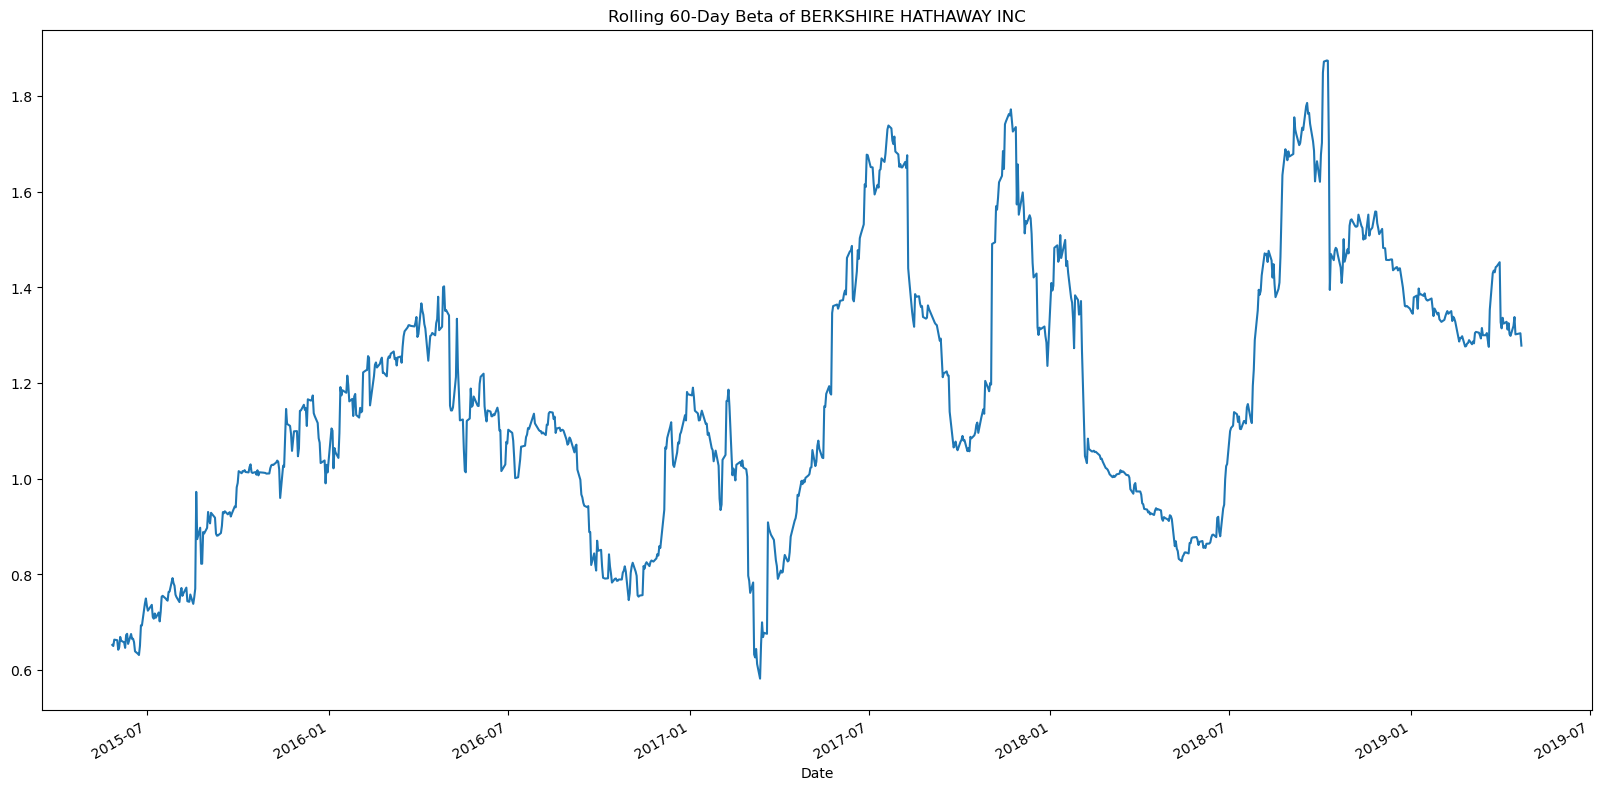

In [35]:
###################################################
### Let us use BERKSHIRE HATHAWAY INC portfolio ###
###################################################

# Calculate covariance of a single portfolio
covariance_bh = jdr_df["BERKSHIRE HATHAWAY INC"].cov(jdr_df["S&P TSX"])
print(f"The covariance of BERKSHIRE HATHAWAY INC and S&P TSX: {covariance_bh}")

# Calculate variance of S&P 500
variance_sp500 = jdr_df["S&P TSX"].var()
print(f"The variance of S&P 500: {variance_sp500}")

# Computing beta
beta_bh = covariance_bh / variance_sp500
print(f"The beta of BERKSHIRE HATHAWAY INC is: {beta_bh}")
print()

# Plot beta trend
rolling_covariance_bh = jdr_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(jdr_df['S&P TSX'])
rolling_variance_sp500 = jdr_df ['S&P TSX'].rolling(window=60).var()
rolling_beta_bh = rolling_covariance_bh / rolling_variance_sp500
print("Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC")
print()

rolling_beta_bh.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [36]:
# Use `ewm` to calculate the rolling window
jdr_ewm_21 = jdr_df.ewm(halflife=21).std()
print(jdr_ewm_21)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN                 NaN   
2015-03-04                   0.002472            0.005814   
2015-03-05                   0.002677            0.004968   
2015-03-06                   0.005349            0.004615   
2015-03-09                   0.004638            0.004471   
...                               ...                 ...   
2019-04-16                   0.007632            0.006846   
2019-04-17                   0.007547            0.006846   
2019-04-18                   0.007424            0.006737   
2019-04-22                   0.007336            0.006764   
2019-04-23                   0.007294            0.006682   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                          NaN             

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [37]:
# Annualized Sharpe Ratios
average_returns_df = jdr_df.mean()

# Let us recall that *joined_annual_std* is our anual standard deviation variable
sharpe_ratios_df = average_returns_df / joined_annual_std
print("Our Sharpe ratios are:")
print(sharpe_ratios_df)


Our Sharpe ratios are:
Algo 1                         0.005471
Algo 2                         0.001990
BERKSHIRE HATHAWAY INC         0.002468
PAULSON & CO.INC.             -0.001919
S&P TSX                        0.002572
SOROS FUND MANAGEMENT LLC      0.001414
TIGER GLOBAL MANAGEMENT LLC   -0.000480
dtype: float64


<Axes: >

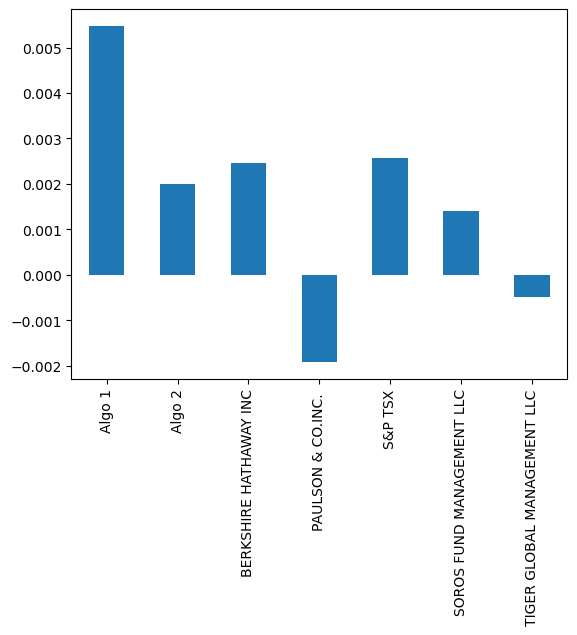

In [38]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_df.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

'''As we can see, the Algo 1 strategy yelds both highiest retuns and the highest Sharpe ratio. Therefore, we can conclude that the Algo 1 strategy is the best of the banch and it outperforms the market. However, the Algo 2 portfolio ranks average in both categories.'''
'''

Its Sharpe ratio of .199 indicates a positive risk-adjusted return, but its value is negligable. From this we can conclude that Algo 2 performance is average and just about identical to the market(S&P 50'''0).

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [39]:
# Reading data from 1st stock
# google sheets function call: "=GOOGLEFINANCE("F", "price", "2016-01-01", "2016-12-31", "DAILY")"
ford_history_data = Path("Resources/ford_historical_2016.csv")
ford_2016_df = pd.read_csv(ford_history_data, index_col=0)
print(ford_2016_df)


                     Close
Date                      
1/4/2016 16:00:00    13.97
1/5/2016 16:00:00    13.72
1/6/2016 16:00:00    13.11
1/7/2016 16:00:00    12.70
1/8/2016 16:00:00    12.54
...                    ...
12/23/2016 16:00:00  12.46
12/27/2016 16:00:00  12.39
12/28/2016 16:00:00  12.25
12/29/2016 16:00:00  12.23
12/30/2016 16:00:00  12.13

[252 rows x 1 columns]


In [40]:
# Reading data from 2nd stock
# google sheets function call: "=GOOGLEFINANCE("HPQ", "price", "2016-01-01", "2016-12-31", "DAILY")"
hewlett_packard_data = Path("Resources/hp_historical_2016.csv")
hp_2016_df = pd.read_csv(hewlett_packard_data, index_col=0)
print(hp_2016_df)


                     Close
Date                      
1/4/2016 16:00:00    11.60
1/5/2016 16:00:00    11.71
1/6/2016 16:00:00    11.29
1/7/2016 16:00:00    10.77
1/8/2016 16:00:00    10.58
...                    ...
12/23/2016 16:00:00  15.10
12/27/2016 16:00:00  15.21
12/28/2016 16:00:00  14.94
12/29/2016 16:00:00  14.94
12/30/2016 16:00:00  14.84

[252 rows x 1 columns]


In [41]:
# Reading data from 3rd stock
# google sheets function call: =GOOGLEFINANCE("MS", "price", "2016-01-01", "2016-12-31", "DAILY")
 
morgan_stanley_data = Path("Resources/morgan_stanley_historical_2016.csv")
ms_2016_df = pd.read_csv(morgan_stanley_data, index_col=0)
print(ms_2016_df)

                     Close
Date                      
1/4/2016 16:00:00    31.48
1/5/2016 16:00:00    31.28
1/6/2016 16:00:00    30.50
1/7/2016 16:00:00    28.98
1/8/2016 16:00:00    28.38
...                    ...
12/23/2016 16:00:00  43.06
12/27/2016 16:00:00  43.12
12/28/2016 16:00:00  42.62
12/29/2016 16:00:00  42.15
12/30/2016 16:00:00  42.25

[252 rows x 1 columns]


In [42]:
# Reading data from 4th stock
# google sheets function call: =GOOGLEFINANCE("META", "price", "2016-01-01", "2016-12-31", "DAILY")
meta_data = Path("Resources/meta_historical_2016.csv")
meta_2016_df = pd.read_csv(meta_data, index_col=0)
print(meta_2016_df)



                      Close
Date                       
1/4/2016 16:00:00    102.22
1/5/2016 16:00:00    102.73
1/6/2016 16:00:00    102.97
1/7/2016 16:00:00     97.92
1/8/2016 16:00:00     97.33
...                     ...
12/23/2016 16:00:00  117.27
12/27/2016 16:00:00  118.01
12/28/2016 16:00:00  116.92
12/29/2016 16:00:00  116.35
12/30/2016 16:00:00  115.05

[252 rows x 1 columns]


In [43]:
# Combine all stocks in a single DataFrame
custom_stocks_2016_df = custom_portfolio_df =pd.concat([ford_2016_df, hp_2016_df, ms_2016_df,meta_2016_df ], axis='columns', join='inner')
print(custom_stocks_2016_df)
#print(custom_stocks_2016_df.dtypes)
#custom_stocks_2016_df.drop(['Date'], axis = 1)


                     Close  Close  Close   Close
Date                                            
1/4/2016 16:00:00    13.97  11.60  31.48  102.22
1/5/2016 16:00:00    13.72  11.71  31.28  102.73
1/6/2016 16:00:00    13.11  11.29  30.50  102.97
1/7/2016 16:00:00    12.70  10.77  28.98   97.92
1/8/2016 16:00:00    12.54  10.58  28.38   97.33
...                    ...    ...    ...     ...
12/23/2016 16:00:00  12.46  15.10  43.06  117.27
12/27/2016 16:00:00  12.39  15.21  43.12  118.01
12/28/2016 16:00:00  12.25  14.94  42.62  116.92
12/29/2016 16:00:00  12.23  14.94  42.15  116.35
12/30/2016 16:00:00  12.13  14.84  42.25  115.05

[252 rows x 4 columns]


In [44]:
# Reset Date index
custom_stocks_2016_df.index = pd.to_datetime(custom_stocks_2016_df.index)
#custom_stocks_2016_df.set_axis(['Ford', 'Hewlett Packard', 'Morgan Stanley', 'Meta'], axis=1)
#custom_stocks_2016.set_index(pd.to_datetime(custom_stocks_2016_df['Date'], infer_datetime_format=True), inplace=True)
custom_stocks_2016_df.head()

,Close,Close,Close,Close
Date,,,,
2016-01-04 16:00:00,13.97,11.60,31.48,102.22
2016-01-05 16:00:00,13.72,11.71,31.28,102.73
2016-01-06 16:00:00,13.11,11.29,30.50,102.97
2016-01-07 16:00:00,12.70,10.77,28.98,97.92
2016-01-08 16:00:00,12.54,10.58,28.38,97.33


In [45]:
# Reorganize portfolio data by having a column per symbol
custom_stocks_2016_df = custom_stocks_2016_df.set_axis(['Ford', 'Hewlett Packard', 'Morgan Stanley', 'Meta'], axis=1)
custom_stocks_2016_df

,Ford,Hewlett Packard,Morgan Stanley,Meta
Date,,,,
2016-01-04 16:00:00,13.97,11.60,31.48,102.22
2016-01-05 16:00:00,13.72,11.71,31.28,102.73
2016-01-06 16:00:00,13.11,11.29,30.50,102.97
2016-01-07 16:00:00,12.70,10.77,28.98,97.92
2016-01-08 16:00:00,12.54,10.58,28.38,97.33
...,...,...,...,...
2016-12-23 16:00:00,12.46,15.10,43.06,117.27
2016-12-27 16:00:00,12.39,15.21,43.12,118.01
2016-12-28 16:00:00,12.25,14.94,42.62,116.92


In [46]:
# Calculate daily returns
custom_stocks_2016_daily_returns_df = custom_stocks_2016_df.pct_change()
# Drop NAs
custom_stocks_2016_daily_returns_df = custom_stocks_2016_daily_returns_df.dropna()

# # Display sample data
custom_stocks_2016_daily_returns_df.head()


,Ford,Hewlett Packard,Morgan Stanley,Meta
Date,,,,
2016-01-05 16:00:00,-0.017895,0.009483,-0.006353,0.004989
2016-01-06 16:00:00,-0.044461,-0.035867,-0.024936,0.002336
2016-01-07 16:00:00,-0.031274,-0.046058,-0.049836,-0.049043
2016-01-08 16:00:00,-0.012598,-0.017642,-0.020704,-0.006025
2016-01-11 16:00:00,0.018341,0.006616,0.002819,0.001849


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [47]:
# Set weights
# weights = [1/3, 1/3, 1/3]
# since we have 4 kinds of shares, we will set different weights variable (1/4 s)
weights = [1/4, 1/4, 1/4, 1/4]
#print(sum(weights)) - a quick check to make sure weights add up to 1.

# Calculate portfolio return
custom_portfolio_return_df = custom_stocks_2016_daily_returns_df * weights
# Display sample data
custom_portfolio_return_df.head()
custom_portfolio_return_df = custom_portfolio_return_df.set_index(pd.to_datetime(custom_portfolio_return_df.index, format='%Y-%d-%m').strftime("%Y-%m-%d"))
custom_portfolio_return_df.head()

,Ford,Hewlett Packard,Morgan Stanley,Meta
Date,,,,
2016-01-05,-0.004474,0.002371,-0.001588,0.001247
2016-01-06,-0.011115,-0.008967,-0.006234,0.000584
2016-01-07,-0.007818,-0.011515,-0.012459,-0.012261
2016-01-08,-0.003150,-0.004410,-0.005176,-0.001506
2016-01-11,0.004585,0.001654,0.000705,0.000462


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [48]:
# Join your returns DataFrame to the original returns DataFrame
overall_df = pd.concat([jdr_df, custom_portfolio_return_df], axis='columns', join='inner')

In [49]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
overall_df = overall_df.dropna()

#####################################################
# The resulting dataframe is an empty dataframe
# I think it is because of minsmatch in index dates
# I was not able to continue after this error
#####################################################


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [50]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [51]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [52]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [53]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [54]:
# Calculate Annualized Sharpe Ratios


In [55]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!